# Regression Analysis

## Table of Contents

1. [Setup and Installation](#32-setup-and-installation)
   - [1.1 Import Libraries](#32-import-libraries)
   - [1.2 Installing Required Packages](#32-installing-required-packages)

2. [Data Load, Inspection & Transformation](#32-data-load,-inspection-&-transformation) 
   - [2.1 Load CSV](#32-load-csv)
   - [2.2 Inspect dataset](#32-inspect-dataset)
   - [2.3 Data Transformation](#32-data-transformation)

3. [Exploratory Data Analysis](#32-exploratory-data-analysis)
   - [3.1 Linearity Analysis](#32-linearity-analysis)
   - [3.2 Multicollinearity Analysis ](#32-multicollinearity-analysis)

4. [Model Building](#4-model-building)
   - [4.1 Model Selection ](#41-model-selection)
   - [4.2 Model Training ](#42-model-training)
   - [4.3 Model Evaluation ](#43-model-evaluation)
   


## 1. Setup and Installation

### Required Packages
The following libraries are required for this analysis:
- **Pandas**: Data manipulation and analysis
- **Matplotlib**: Data visualization
- **Numpy**: Numerical manupilations
- **Statsmodel** : Fit data to models
- **SKLEAN** : Machine learning algorithms

### 1.1 Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
import math
from statsmodels.graphics.correlation import plot_corr
from data_load import clean_dataframe_columns
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import math
import warnings
warnings.filterwarnings('ignore')

### 1.2 Installing Required Packages

In [4]:
%pip install -r requirements.txt

## 2 Data Load, Inspection & Transformation

### 2.1 Load CSV

In [10]:
#Load csv to df
df = pd.read_csv('co2_emissions_from_agri.csv')

### 2.2 Data Inspection  

In [11]:
# For a more detailed summary including non-null counts
print(df.head())

          Area  Year  Savanna fires  Forest fires  Crop Residues  \
0  Afghanistan  1990        14.7237        0.0557       205.6077   
1  Afghanistan  1991        14.7237        0.0557       209.4971   
2  Afghanistan  1992        14.7237        0.0557       196.5341   
3  Afghanistan  1993        14.7237        0.0557       230.8175   
4  Afghanistan  1994        14.7237        0.0557       242.0494   

   Rice Cultivation  Drained organic soils (CO2)  Pesticides Manufacturing  \
0            686.00                          0.0                 11.807483   
1            678.16                          0.0                 11.712073   
2            686.00                          0.0                 11.712073   
3            686.00                          0.0                 11.712073   
4            705.60                          0.0                 11.712073   

   Food Transport  Forestland  ...  Manure Management  Fires in organic soils  \
0         63.1152   -2388.803  ...       

In [12]:
# Describe numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6965.0,2.005125e+03,8.894665e+00,1990.000000,1997.000000,2.005000e+03,2.013000e+03,2.020000e+03
Savanna fires,6934.0,1.188391e+03,5.246288e+03,0.000000,0.000000,1.651850e+00,1.110814e+02,1.146164e+05
Forest fires,6872.0,9.193022e+02,3.720079e+03,0.000000,0.000000,5.179000e-01,6.495077e+01,5.222763e+04
Crop Residues,5576.0,9.987063e+02,3.700345e+03,0.000200,11.006525,1.036982e+02,3.776410e+02,3.349007e+04
Rice Cultivation,6965.0,4.259667e+03,1.761383e+04,0.000000,181.260800,5.348174e+02,1.536640e+03,1.649153e+05
Drained organic soils (CO2),6965.0,3.503229e+03,1.586145e+04,0.000000,0.000000,0.000000e+00,6.904088e+02,2.410251e+05
Pesticides Manufacturing,6965.0,3.334184e+02,1.429159e+03,0.000000,6.000000,1.300000e+01,1.163255e+02,1.645900e+04
Food Transport,6965.0,1.939582e+03,5.616749e+03,0.000100,27.958600,2.049628e+02,1.207001e+03,6.794576e+04
Forestland,6472.0,-1.782829e+04,8.183221e+04,-797183.079000,-2848.350000,-6.292000e+01,0.000000e+00,1.711211e+05
Net Forest conversion,6472.0,1.760564e+04,1.011575e+05,0.000000,0.000000,4.444000e+01,4.701746e+03,1.605106e+06


In [13]:
#get the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

### 2.3 Data Transformation

In [14]:
# Clean columns using the function imported from data_load.py
df = clean_dataframe_columns(df)

Dropped 'area' column successfully!

Missing values found in the following columns:
savanna_fires                        31
forest_fires                         93
crop_residues                      1389
forestland                          493
net_forest_conversion               493
food_household_consumption          473
ippu                                743
manure_applied_to_soils             928
manure_management                   928
fires_in_humid_tropical_forests     155
on_farm_energy_use                  956
dtype: int64
Filled 0 missing values in 'savanna_fires' with median: 1.65
Filled 0 missing values in 'forest_fires' with median: 0.52
Filled 0 missing values in 'crop_residues' with median: 103.70
Filled 0 missing values in 'forestland' with median: -62.92
Filled 0 missing values in 'net_forest_conversion' with median: 44.44
Filled 0 missing values in 'food_household_consumption' with median: 155.47
Filled 0 missing values in 'ippu' with median: 803.71
Filled 0 missing va

In [15]:
# Print the list of columns
df.columns.tolist()

['total_emission',
 'year',
 'savanna_fires',
 'forest_fires',
 'crop_residues',
 'rice_cultivation',
 'drained_organic_soils_co',
 'pesticides_manufacturing',
 'food_transport',
 'forestland',
 'net_forest_conversion',
 'food_household_consumption',
 'food_retail',
 'on_farm_electricity_use',
 'food_packaging',
 'agrifood_systems_waste_disposal',
 'food_processing',
 'fertilizers_manufacturing',
 'ippu',
 'manure_applied_to_soils',
 'manure_left_on_pasture',
 'manure_management',
 'fires_in_organic_soils',
 'fires_in_humid_tropical_forests',
 'on_farm_energy_use',
 'rural_population',
 'urban_population',
 'total_population_male',
 'total_population_female',
 'average_temperature_c']

## 3 Exploratory Data Analysis

### 3.1 Linearity Analysis

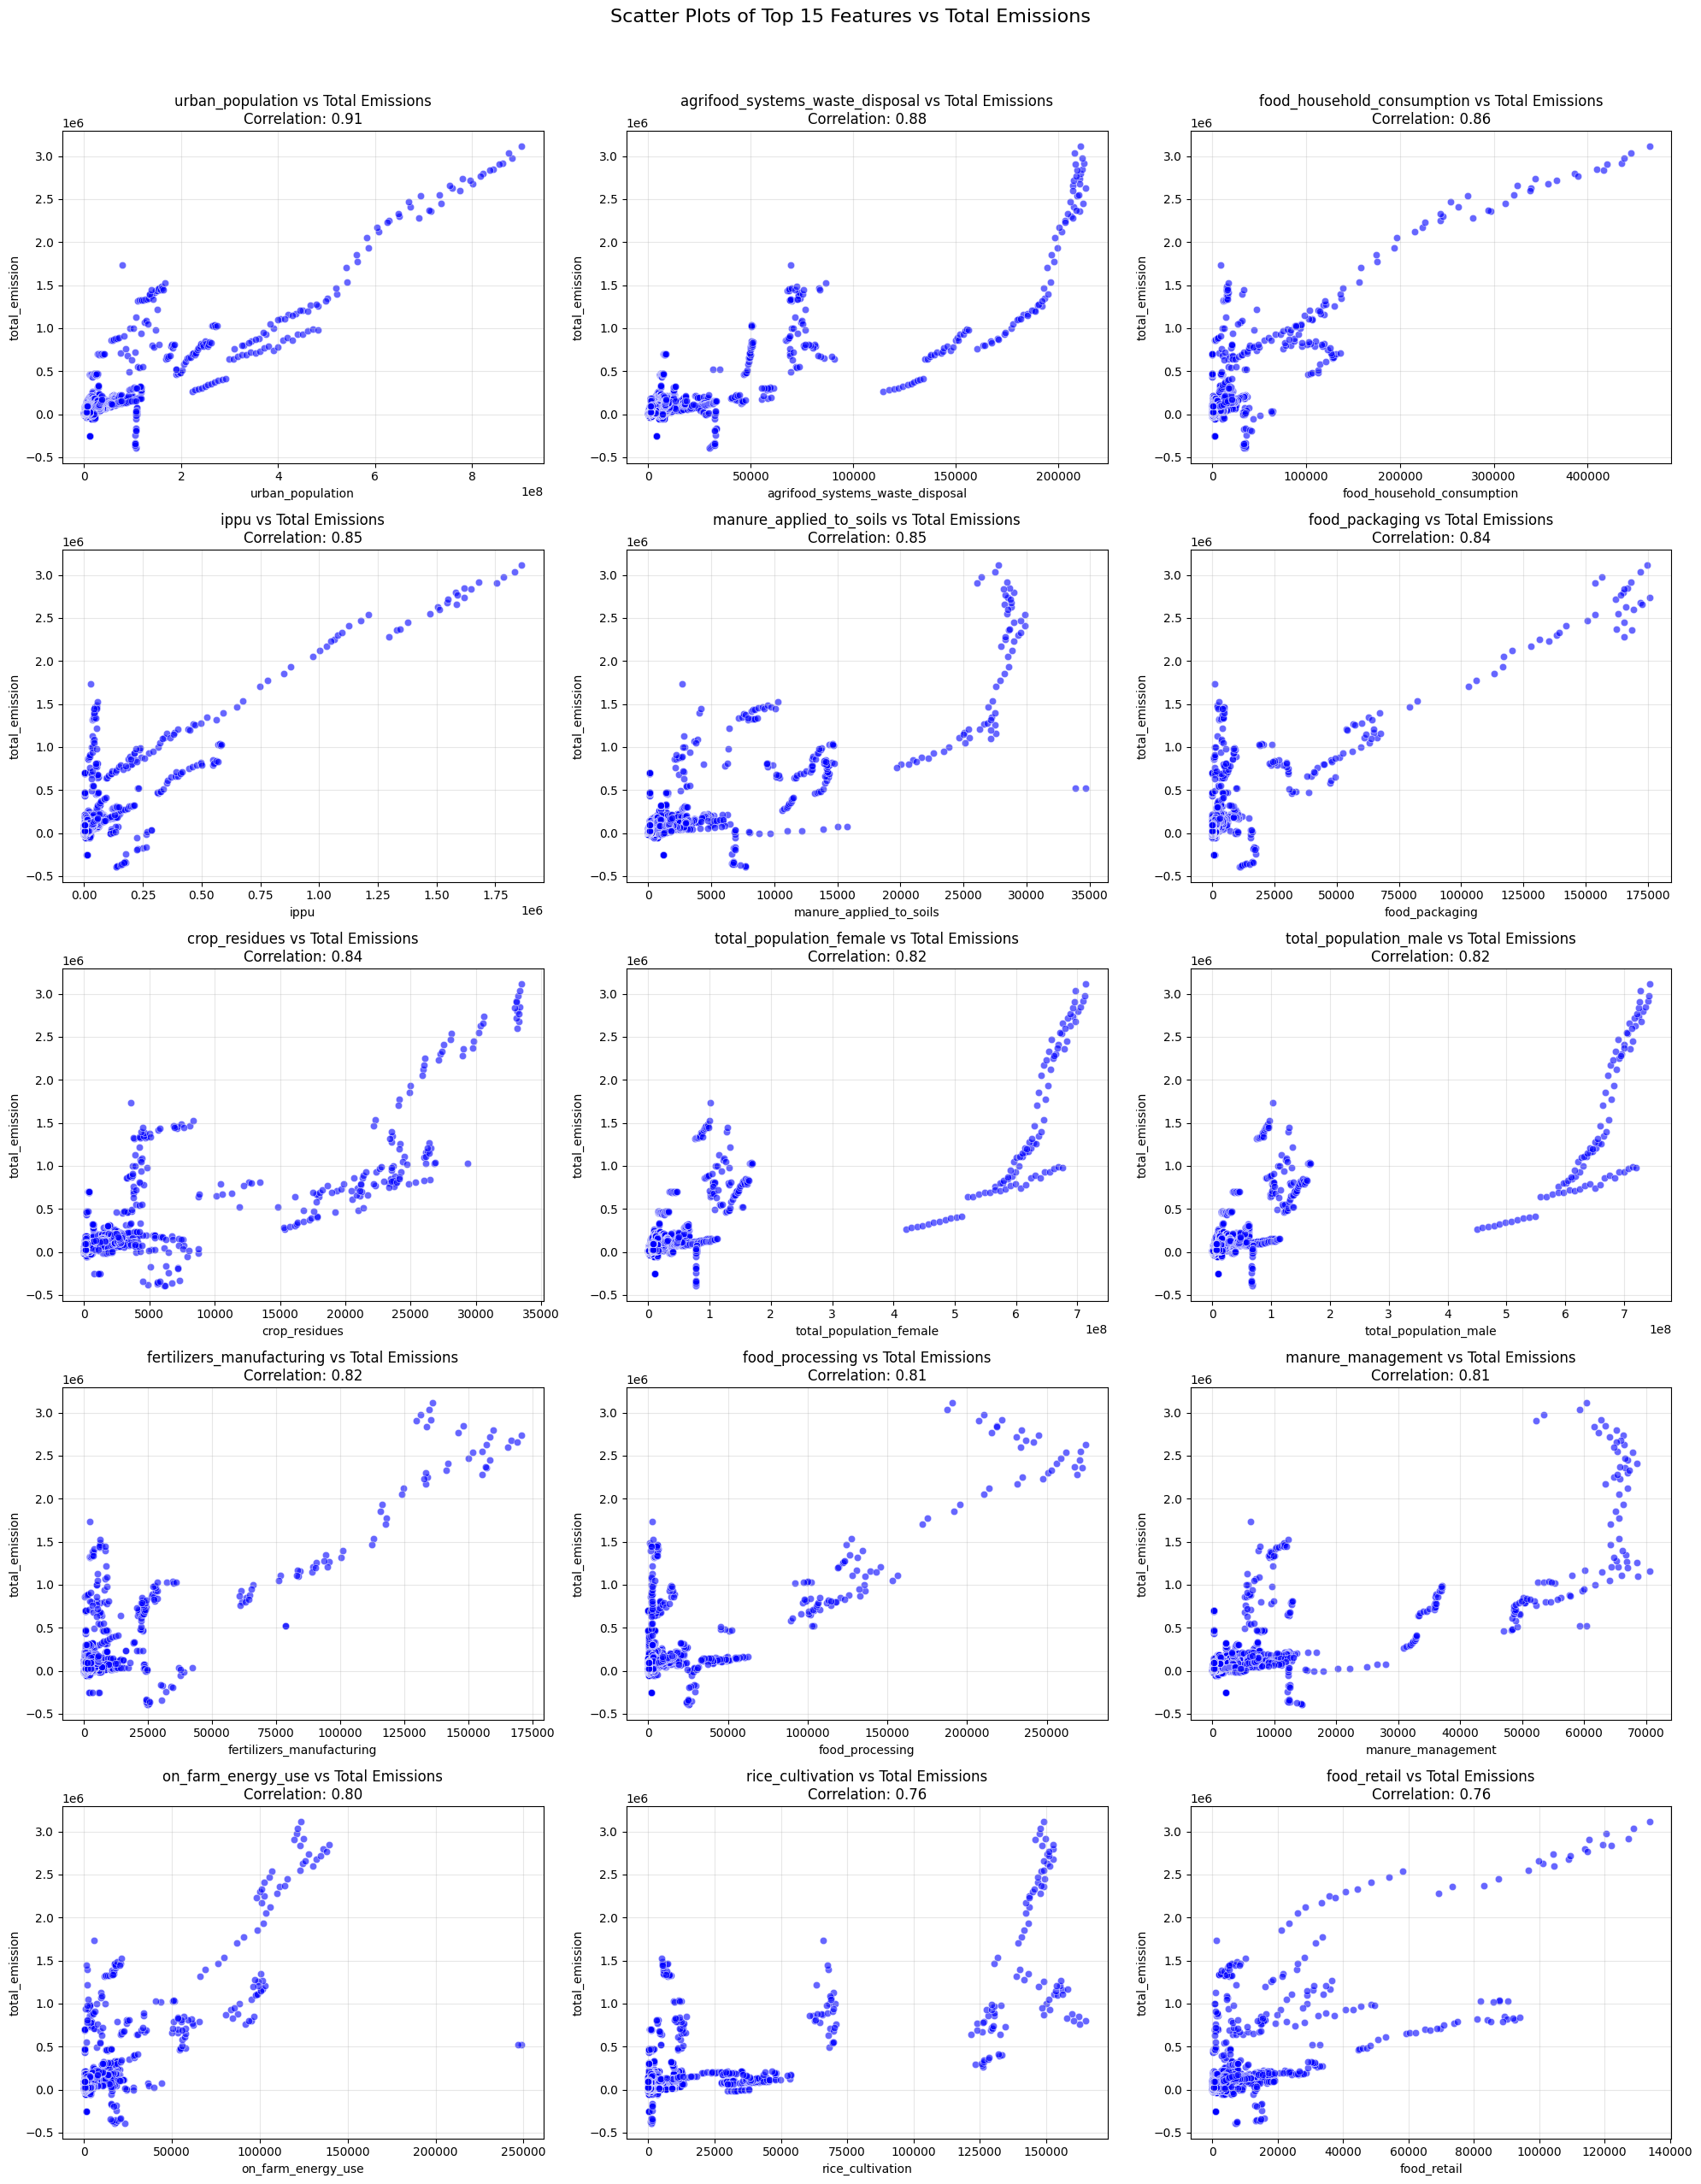

In [33]:

# Select only numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df[numeric_cols]

# Calculate correlation with total_emission
correlation_with_target = df_numeric.corr()['total_emission'].sort_values(ascending=False)

# Get top 15 most correlated features (excluding total_emission itself)
top_features = correlation_with_target.index[1:16]  # top 15 features

# Set up the figure
plt.figure(figsize=(20, 25))
plt.suptitle('Scatter Plots of Top 15 Features vs Total Emissions', y=1.02, fontsize=16)

# Create subplots
for i, feature in enumerate(top_features, 1):
    plt.subplot(5, 3, i)
    sns.scatterplot(data=df, x=feature, y='total_emission', alpha=0.6, color='blue')
    plt.title(f'{feature} vs Total Emissions\nCorrelation: {correlation_with_target[feature]:.2f}')
    plt.tight_layout()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

- It appears that a significant amount of our variables have an approximately linear relationship. Here, a trend between each of `food household consumption, Food Packgaging, IPPU, Fertilization Manufacturing, Urban or Rural Population`, and `total_emission` seems to exist. Based on these findings, there is enough linearity present to apply a linear regression model on the data.


### 3.2 Correlation Analysis

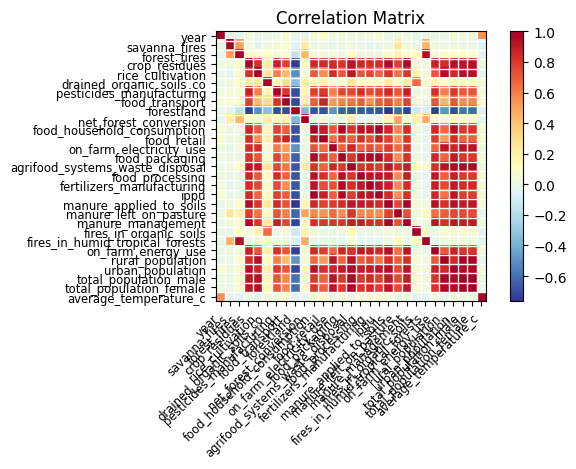

In [34]:
df2=df.copy() 
#Create correlation plot
corr = df2.drop('total_emission', axis=1).corr()
plot_corr(corr, xnames=corr.columns)
plt.tight_layout()  # Ensures all labels fit properly
plt.show()

From the correlation heatmap, we can see several strong correlations among predictors.

### 3.3 Multicollinearity Analysis

In [35]:
print("Missing values:\n", df.isna().sum())

Missing values:
 total_emission                     0
year                               0
savanna_fires                      0
forest_fires                       0
crop_residues                      0
rice_cultivation                   0
drained_organic_soils_co           0
pesticides_manufacturing           0
food_transport                     0
forestland                         0
net_forest_conversion              0
food_household_consumption         0
food_retail                        0
on_farm_electricity_use            0
food_packaging                     0
agrifood_systems_waste_disposal    0
food_processing                    0
fertilizers_manufacturing          0
ippu                               0
manure_applied_to_soils            0
manure_left_on_pasture             0
manure_management                  0
fires_in_organic_soils             0
fires_in_humid_tropical_forests    0
on_farm_energy_use                 0
rural_population                   0
urban_population     

In [36]:
#Generate the regression string
formula_str = df.columns[0]+' ~ '+'+'.join(df.columns[1:])
formula_str

'total_emission ~ year+savanna_fires+forest_fires+crop_residues+rice_cultivation+drained_organic_soils_co+pesticides_manufacturing+food_transport+forestland+net_forest_conversion+food_household_consumption+food_retail+on_farm_electricity_use+food_packaging+agrifood_systems_waste_disposal+food_processing+fertilizers_manufacturing+ippu+manure_applied_to_soils+manure_left_on_pasture+manure_management+fires_in_organic_soils+fires_in_humid_tropical_forests+on_farm_energy_use+rural_population+urban_population+total_population_male+total_population_female+average_temperature_c'

In [37]:
#Construct and fit the model using ols
model=sm.ols(formula=formula_str, data=df)
fitted = model.fit()

#Print the summary of the model
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:         total_emission   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.605e+07
Date:                Wed, 08 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:45:46   Log-Likelihood:                -50884.
No. Observations:                6965   AIC:                         1.018e+05
Df Residuals:                    6935   BIC:                         1.020e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

****** Analysis results output as stated in the output that there exists a s strong multicollinearity ******

## 4. [Model Building](#4-model-building)

###    - [4.1 Model Selection ](#41-model-selection)
Fitting a multivariate regression model

###    - [4.2 Model Training ](#42-model-training)
###    - [4.3 Model Evaluation ](#43-model-evaluation)
   

###    - [4.1 Model Selection ](#41-model-selection)
Fitting a Linear Regression model

In [ ]:
df1=df.copy()

In [31]:
# split predictors and response
X = df1.drop(['total_emission'], axis=1)
y = df1['total_emission']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
# extract model intercept
beta_0 = float(model.intercept_)
print("Intercept:", beta_0)


Intercept: -358.18584933911916


In [19]:
# extract model coefficients
beta_js = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Coefficients:", beta_js)

Coefficients:                                  Coefficient
year                                0.088514
savanna_fires                       1.010540
forest_fires                        1.012007
crop_residues                       0.983927
rice_cultivation                    0.983431
drained_organic_soils_co            1.001088
pesticides_manufacturing            1.033325
food_transport                      0.975982
forestland                          0.999943
net_forest_conversion               1.000540
food_household_consumption          1.002279
food_retail                         0.986157
on_farm_electricity_use             0.984872
food_packaging                      0.976887
agrifood_systems_waste_disposal     1.002439
food_processing                     0.998868
fertilizers_manufacturing           0.978473
ippu                                1.001039
manure_applied_to_soils             0.882211
manure_left_on_pasture              0.978006
manure_management                   1.046

The results show the coefficients of the features in the model. These coefficients indicate the change in the response variable for a one-unit change in the corresponding feature, holding all other features constant. Positive coefficients indicate a positive relationship with the response variable, while negative coefficients indicate a negative relationship

#### Assessing model accuracy

Model will be measured agiasnt crop_residues as randomly selected to test its fit.

In [21]:
slr = LinearRegression()

slr.fit(X_train[['crop_residues']], y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
# dictionary of results
results_dict = {'Training MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_train, slr.predict(X_train[['crop_residues']])),
                        "MLR": metrics.mean_squared_error(y_train, model.predict(X_train))
                    },
                'Test MSE':
                    {
                        "SLR": metrics.mean_squared_error(y_test, slr.predict(X_test[['crop_residues']])),
                        "MLR": metrics.mean_squared_error(y_test, model.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "SLR": math.sqrt(metrics.mean_squared_error(y_test, slr.predict(X_test[['crop_residues']]))),
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test)))
                    }
                }

In [ ]:
results_df = pd.DataFrame(data=results_dict)
results_df


By incorporating multiple predictors simultaneously, the multiple linear regression model can account for the combined influence of those factors on the dependent variable, resulting in improved predictive performance and a more accurate representation of the underlying relationship in the data instead of single variable.

#### Checking for independence

Residuals vs. predictor variable plots
- Residuals are approximately uniformly and randomly distributed about the zero x-axes.
- Residuals are not forming any specific clusters.
- Residuals are not showing any specific patterns.

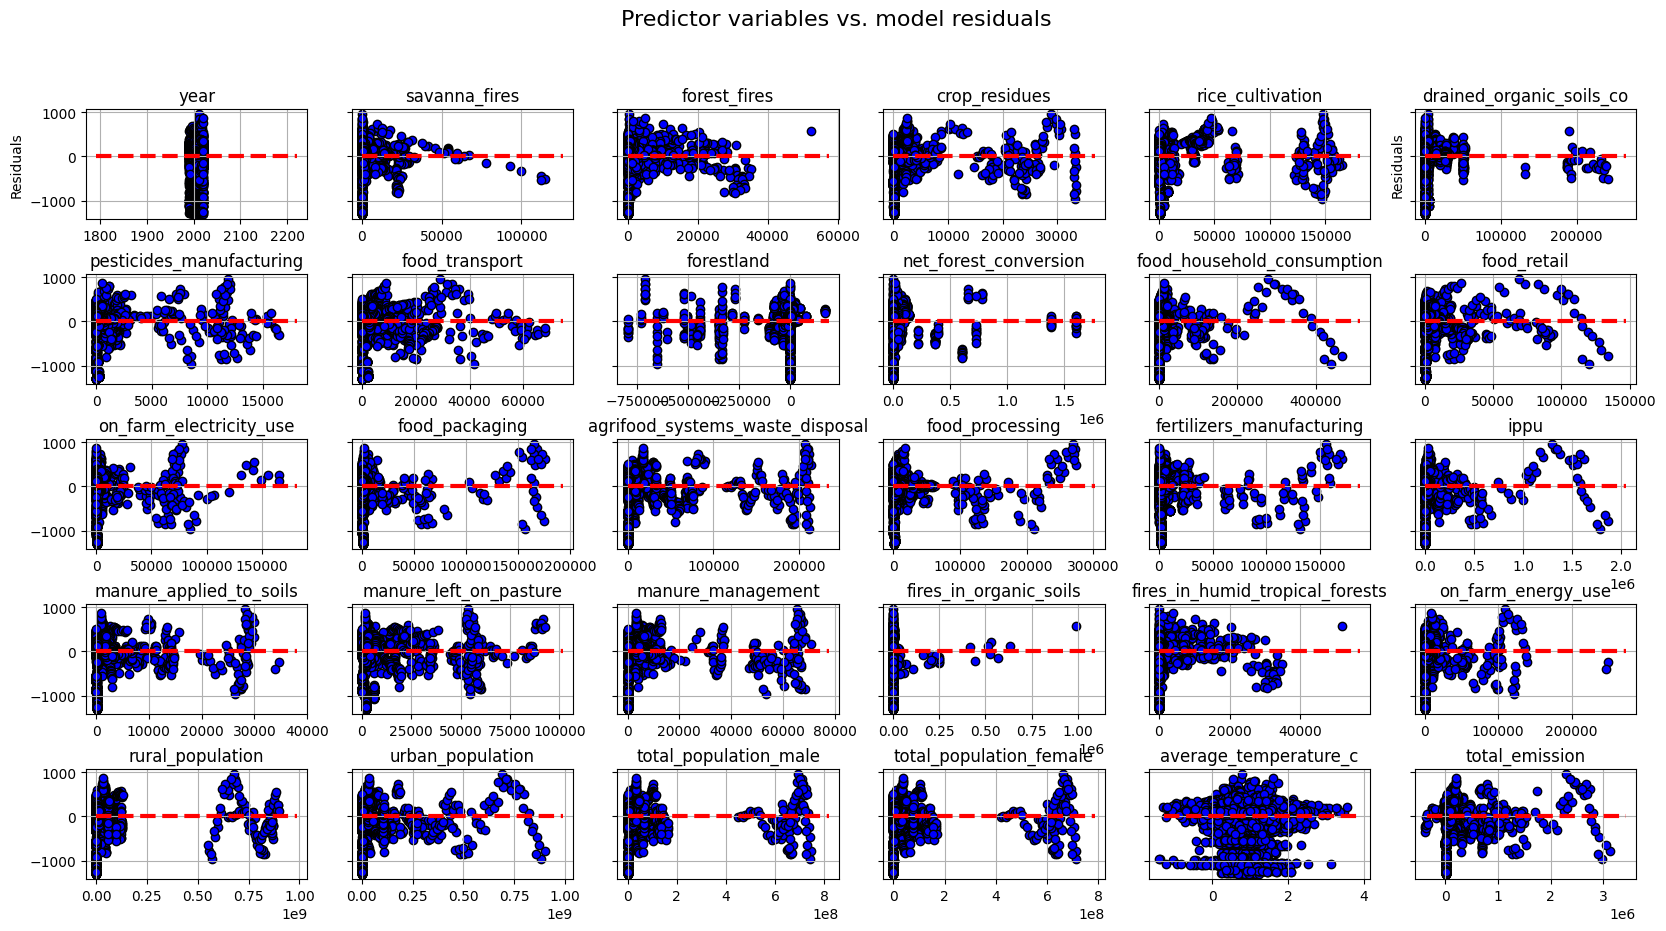

In [37]:
fig, axs = plt.subplots(5,6 ,figsize=(20,10),sharey=True)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
fig.suptitle('Predictor variables vs. model residuals', fontsize=16)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{}".format(column),fontsize=12)
    axs[index-1].scatter(x=df1[column],y=fitted.resid,color='blue',edgecolor='k')
    axs[index-1].grid(True)
    xmin = min(df[column])
    xmax = max(df[column])
    axs[index-1].hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    if index == 1 or index == 6:
        axs[index-1].set_ylabel('Residuals')

There is observed skewness to either side , being positive or negative. A weak to no actual clustered patterns are visible in the residuals.

Therfore, safe to conclude that the residuals are independent.

#### Checking for homoscedasticity

Fitted vs. residuals

- Homoscedasticity
 The scatterplot should exhibit a random and uniform spread of points, indicating that the variance of the residuals remains constant across all levels of the predictor variable(s).
 - Heteroscedasticity
 It is evident when the spread of the residuals systematically changes as the fitted values increase or decrease, potentially resembling a cone shape.

 In summary : Homoscedasticity implies a constant variance of the residuals across different levels of the predictor variable(s), while heteroscedasticity indicates varying variances

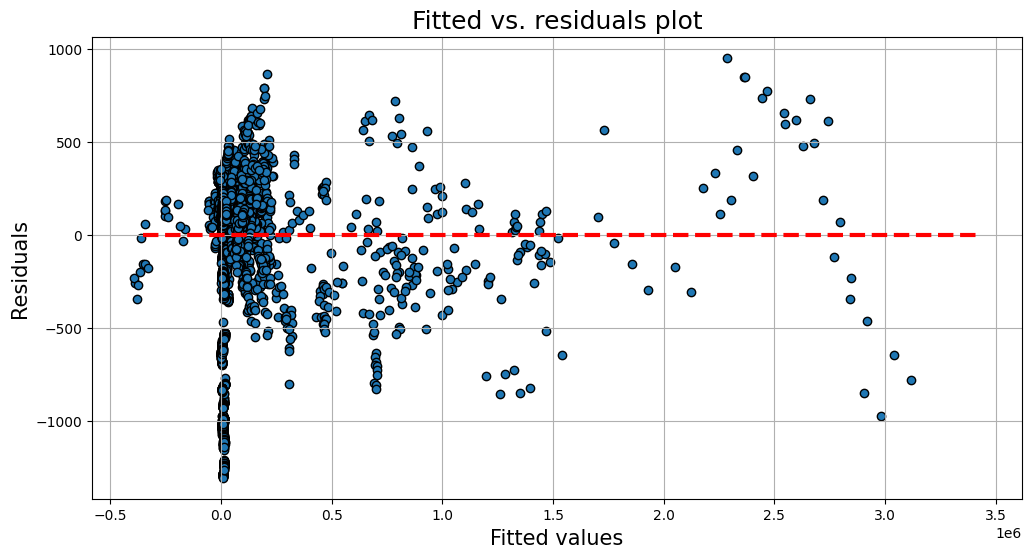

In [40]:
plt.figure(figsize=(12,6))
p=plt.scatter(x=fitted.fittedvalues,y=fitted.resid,edgecolor='k')
xmin = min(fitted.fittedvalues)
xmax = max(fitted.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

The points towards the right side of the plot are scattered slightly less densely and this suggest a possibility of heteroscedasticity.

#### Checking for normality

It is fairly easy to recognise when a distribution resembles the classic **_bell curve_** shape of the normal distribution

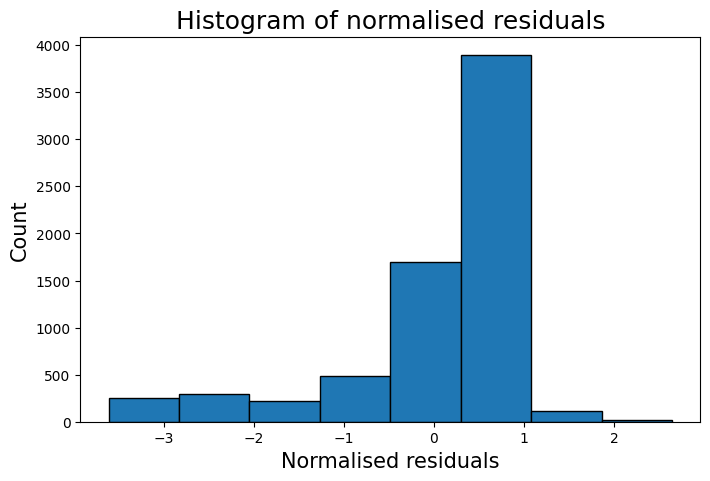

In [41]:
plt.figure(figsize=(8,5))
plt.hist(fitted.resid_pearson,bins=8,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalised residuals',fontsize=15)
plt.title("Histogram of normalised residuals",fontsize=18)
plt.show()